### 신경망에서의 기울기

신경망 학습에서도 기울기를 구해야합니다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기입니다.

[예) 형상 2X3, 가중치가 W, 손실함수가 L인 신경망]

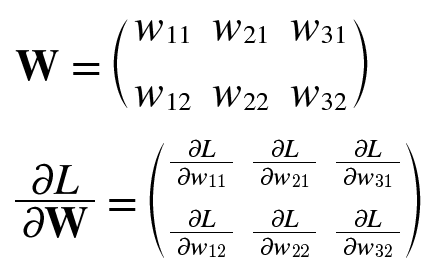

In [1]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝


In [2]:
# 신경망 기울기 구하기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common_function import softmax, cross_entropy_error
from common_gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)    # 정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [3]:
net = simpleNet()
print(net.W)    # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))   # 최댓값의 인덱스

t = np.array([0, 0, 1])   # 정답 레이블
print(net.loss(x, t))

[[ 1.30857923 -1.40597222  1.21238178]
 [-1.3984371   1.48335726 -0.42066781]]
[-0.47344586  0.4914382   0.34882803]
1
0.9527039502402154


In [4]:
# 기울기 구하기

def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10169227  0.26688967 -0.36858194]
 [ 0.15253841  0.4003345  -0.55287291]]


In [5]:
# 람다 함수로 구현

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

"""기울기를 구한 다음 경사법에 따라 가중치 매개변수를 갱신하기만 하면 됨."""

'기울기를 구한 다음 경사법에 따라 가중치 매개변수를 갱신하기만 하면 됨.'

## 학습 알고리즘 구현하기

[신경망 학습의 절차]
- 전제
  - 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 합니다. 신경망 학습은 다음과 같이 4단계로 수행합니다.

- 1단계 - 미니배치
  - 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.

- 2단계 - 기울기 산출
  - 미니배치의 손시 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.

- 3단계 - 매개변수 갱신
  - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.

- 4단계 - 반복
  - 1~3단계를 반복합니다.

### 이는 경사하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사하강법이라고 부릅니다.

In [6]:
# 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common_function import *
from common_gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y,t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    t = np.argmax(t, aixs=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

### TwoLayerNet 클래스가 사용하는 변수
- params
  1. 신경망의 매개변수를 보관하는 딕셔너리의 변수(인스턴스 변수)
  2. params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향

- grads
  1. params['W2']는 2번째 층의 가중치, params['b2']는 2번째 층의 편향
  2. 기울기 보관하는 딕셔너리 변수(numerical_gradient() 메서드의 반환 값)
  3. grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향 기울기
  4. grads['W2']는 2번째 층의 가중치의 기울기, grads['b2']는 2번째 층의 편향의 기울기

### TwoLayerNet 클래스의 메서드
- \__init__\(self, input_size, hidden_size, output_size)
  1. 초기화를 수행한다.
  2. 인수는 순서대로 입력층의 뉴런 수, 은니층의 뉴런 수, 출력층의 뉴런 수

- predict(self, x)
  1. 예측(추론)을 수행한다.
  2. 인수 x는 이미지 데이터

- loss(self, x, t)
  1. 손실 함수의 값을 구한다.
  2. 인수 x는 이미지 데이터, t는 정답 레이블(아래 칸의 세 메서드의 인수들도 마찬가지)

- accuracy(self, x, t): 정확도를 구한다.
- numerical_gradient(self, x, t): 가중치 매개변수의 기울기를 구한다.
- gradient(self, x, t)
  1. 가중치 매개변수의 기울기를 구한다.
  2. numerical_gradient()의 성능 개선판

In [7]:
# params 변수에는 이 신경망에 필요한 매개변수가 모두 저장

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [8]:
# params 변수에 저장된 가중치 매개변수가 예측처리(순방향 처리)에서 사용됨.
# 예측처리

x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
y = net.predict(x)
print(y)

[[0.10468985 0.10378461 0.09351087 0.10170961 0.09927147 0.10596421
  0.097817   0.10413139 0.09441626 0.09470472]
 [0.10487706 0.10387403 0.09316974 0.10135581 0.09976872 0.10576897
  0.09756033 0.10452369 0.09447946 0.09462219]
 [0.10473779 0.10378121 0.09356404 0.10164836 0.0994895  0.10558307
  0.09756336 0.10419414 0.09460815 0.09483039]
 [0.10510198 0.10358552 0.09332455 0.10146025 0.09983691 0.1057144
  0.09775225 0.10383128 0.09468748 0.09470537]
 [0.10483932 0.10417026 0.0934657  0.1012831  0.09961006 0.10577153
  0.09742409 0.10423052 0.09445713 0.0947483 ]
 [0.10511669 0.10388553 0.09342866 0.1016053  0.09992547 0.10537795
  0.09757548 0.10421723 0.09447624 0.09439145]
 [0.1055181  0.10416018 0.09352328 0.10087856 0.09918269 0.10544045
  0.09782317 0.10414387 0.0945763  0.09475341]
 [0.10512336 0.10358134 0.09360287 0.10182389 0.09946315 0.10601491
  0.09736115 0.10409005 0.09439772 0.09454157]
 [0.10551673 0.10352005 0.09375059 0.10157708 0.09947213 0.10544144
  0.09754483 

In [9]:
# grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장됨.

x = np.random.rand(100, 784)    #  더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)     #  더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)    # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 미니 배치 학습 구현하기

In [ ]:
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch) 성능 개선판

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

[손실 함수 값의 추이: 왼쪽은 10,000회 반복까지의 추이, 오른쪽은 1,000회 반복까지의 추이]

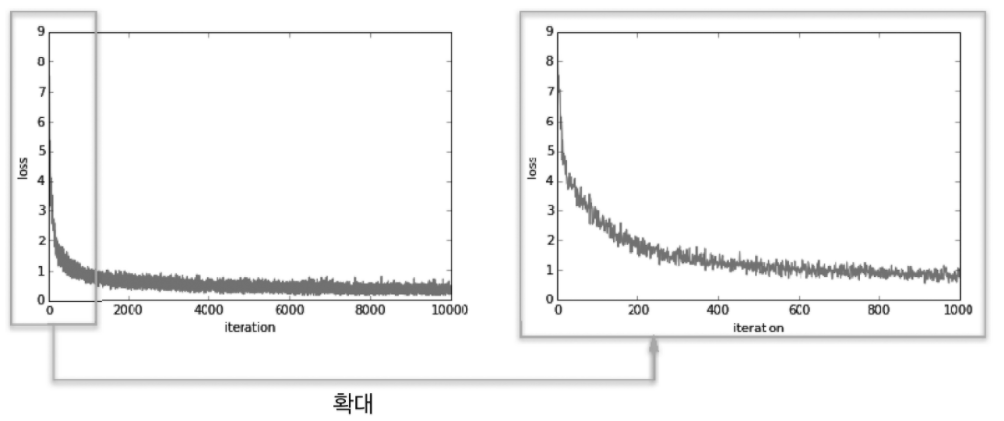

In [ ]:
# 시험 데이터로 평가하기

import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100        # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1','b1','W2','b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f'train acc, test acc : {train_acc}, {test_acc}')

## 정리

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 오차역전파법은 기울기를 고속으로 구현할 수 있다.